In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.getcwd()

'/Users/abhisheksahu'

In [4]:
os.chdir("/Users/abhisheksahu/Documents/Datasets/Housing")

In [5]:
housing=pd.read_csv("cal_housing_clean.csv")

In [6]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB
None


In [7]:
housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [8]:
y=housing[['medianHouseValue']]
x=housing.drop('medianHouseValue',axis=1)

In [9]:
housing.columns[:housing.shape[1]-1]

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome'],
      dtype='object')

In [10]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1002)
mm=MinMaxScaler()
mm.fit(train_x)
tr_x=mm.fit_transform(train_x)
tst_x=mm.fit_transform(test_x)
tr_x=pd.DataFrame(data=tr_x,index=None,columns=housing.columns[:housing.shape[1]-1])
tst_x=pd.DataFrame(data=tst_x,index=None,columns=housing.columns[:housing.shape[1]-1])
tr_y=pd.DataFrame(data=train_y,index=None,columns=[housing.columns[-1]])
tr_y.reset_index(inplace=True,drop=True)
tst_y=pd.DataFrame(data=test_y,index=None,columns=[housing.columns[-1]])
tst_y.reset_index(inplace=True,drop=True)

In [11]:
print(tr_x.head())
print(tr_y.head())

   housingMedianAge  totalRooms  totalBedrooms  population  households  \
0          0.509804    0.244708       0.251397    0.031727    0.067259   
1          0.490196    0.046738       0.045624    0.028056    0.052952   
2          0.176471    0.009569       0.015673    0.003840    0.007893   
3          0.156863    0.149809       0.223619    0.105664    0.205394   
4          0.372549    0.002452       0.001862    0.000785    0.002302   

   medianIncome  
0      0.141012  
1      0.350657  
2      0.089447  
3      0.175356  
4      0.134102  
   medianHouseValue
0          135200.0
1          251700.0
2           37500.0
3          129900.0
4          475000.0


In [12]:
tr_x.describe()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.540832,0.069227,0.083124,0.039760,0.081741,0.232808
std,0.247042,0.057391,0.065588,0.032011,0.062850,0.131305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.038012,0.045469,0.021834,0.045552,0.142615
50%,0.549020,0.055806,0.067194,0.032484,0.066930,0.210218
75%,0.705882,0.082641,0.100093,0.048271,0.098997,0.293448
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


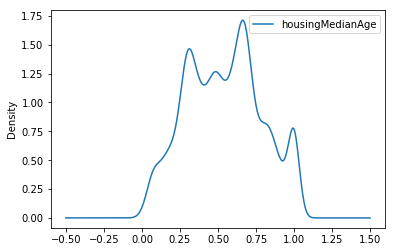

In [13]:
tr_x.plot(kind='density',y='housingMedianAge')

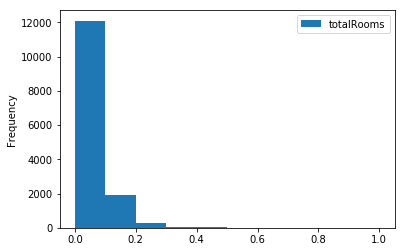

In [14]:
tr_x.plot(kind="hist",y='totalRooms')

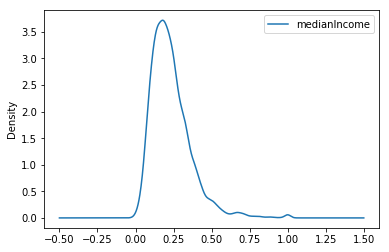

In [15]:
tr_x.plot(kind='density',y='medianIncome')

In [16]:
tf.reset_default_graph()

In [17]:
my_features=[]
for feat in tr_x.columns:
    my_features.append(tf.feature_column.numeric_column(feat))


In [40]:
train_input_fn=tf.estimator.inputs.pandas_input_fn(x=tr_x,y=tr_y.medianHouseValue,batch_size=128,shuffle=True,num_epochs=1000)
test_input_fn=tf.estimator.inputs.pandas_input_fn(x=tst_x,y=tst_y.medianHouseValue,batch_size=128,num_epochs=1,shuffle=False)

In [41]:
print(tr_x.head())
print(tr_y.head())
print("Total records in x {} and in y {}".format(tr_x.shape[0],tr_y.shape[0]))

   housingMedianAge  totalRooms  totalBedrooms  population  households  \
0          0.509804    0.244708       0.251397    0.031727    0.067259   
1          0.490196    0.046738       0.045624    0.028056    0.052952   
2          0.176471    0.009569       0.015673    0.003840    0.007893   
3          0.156863    0.149809       0.223619    0.105664    0.205394   
4          0.372549    0.002452       0.001862    0.000785    0.002302   

   medianIncome  
0      0.141012  
1      0.350657  
2      0.089447  
3      0.175356  
4      0.134102  
   medianHouseValue
0          135200.0
1          251700.0
2           37500.0
3          129900.0
4          475000.0
Total records in x 14448 and in y 14448


In [42]:
model=tf.estimator.LinearRegressor(my_features,model_dir=".")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '.', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2f52eeb8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [43]:
model.train(train_input_fn,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ./model.ckpt.
INFO:tensorflow:loss = 7139392000000.0, step = 1
INFO:tensorflow:global_step/sec: 412.819
INFO:tensorflow:loss = 7692214000000.0, step = 101 (0.244 sec)
INFO:tensorflow:global_step/sec: 408.153
INFO:tensorflow:loss = 6694465700000.0, step = 201 (0.246 sec)
INFO:tensorflow:global_step/sec: 496.322
INFO:tensorflow:loss = 5880601000000.0, step = 301 (0.202 sec)
INFO:tensorflow:global_step/sec: 509.331
INFO:tensorflow:loss = 6768721700000.0, step = 401 (0.197 sec)
INFO:tensorflow:global_step/sec: 535.477
INFO:tensorflow:loss = 8079650300000.0, step = 501 (0.187 sec)
INFO:tensorflow:global_step/sec: 526.291
INFO:tensorflow:loss = 6730884000000.0, step = 601 (0.190 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 610.138
INFO:tensorflow:loss = 6148357000000.0, step = 7601 (0.164 sec)
INFO:tensorflow:global_step/sec: 513.058
INFO:tensorflow:loss = 7287210500000.0, step = 7701 (0.194 sec)
INFO:tensorflow:global_step/sec: 571.008
INFO:tensorflow:loss = 8226215000000.0, step = 7801 (0.177 sec)
INFO:tensorflow:global_step/sec: 575.566
INFO:tensorflow:loss = 8098080000000.0, step = 7901 (0.172 sec)
INFO:tensorflow:global_step/sec: 530.375
INFO:tensorflow:loss = 6249545500000.0, step = 8001 (0.188 sec)
INFO:tensorflow:global_step/sec: 452.597
INFO:tensorflow:loss = 6573937000000.0, step = 8101 (0.221 sec)
INFO:tensorflow:global_step/sec: 532.592
INFO:tensorflow:loss = 7569933300000.0, step = 8201 (0.188 sec)
INFO:tensorflow:global_step/sec: 493.859
INFO:tensorflow:loss = 6523226000000.0, step = 8301 (0.203 sec)
INFO:tensorflow:global_step/sec: 504.131
INFO:tensorflow:loss = 8015566600000.0, step = 8401 (0.198 sec)
INFO:tensorflow:global_step/sec: 435.644
INFO:tensorflo

In [44]:
results=model.evaluate(train_input_fn,steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-03-11:28:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-10-03-11:28:11
INFO:tensorflow:Saving dict for global step 10000: average_loss = 70686835000.0, global_step = 10000, label/mean = 235433.69, loss = 9047915000000.0, prediction/mean = 82.70022
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: ./model.ckpt-10000


In [50]:
print(results)
predict_input_fn=tf.estimator.inputs.pandas_input_fn(x=tr_x,shuffle=False,batch_size=128)

{'average_loss': 70686835000.0, 'label/mean': 235433.69, 'loss': 9047915000000.0, 'prediction/mean': 82.70022, 'global_step': 10000}


In [51]:
prediction=model.predict(predict_input_fn)
print(next(prediction))
#predictions=np.array([pre['predictions'] for pre in prediction])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([88.959915], dtype=float32)}


In [57]:
next(prediction)

{'predictions': array([81.531876], dtype=float32)}

In [33]:
predictions.flatten()

array([61.352905, 59.46376 , 55.05333 , ..., 72.40735 , 50.84472 ,
       63.154   ], dtype=float32)

In [25]:
#actual=tr_y.medianHouseValue.values
#r2=1- np.sum(np.square(actual-pre))/np.sum(np.square(actual -np.mean(actual)))
#print(r2)

In [28]:
print(r2_score(tr_y.medianHouseValue.values,predictions))

ValueError: Found input variables with inconsistent numbers of samples: [14448, 722400]

In [ ]:
print(tf.VERSION)